## Exploratory Data Analytics (EDA)

#### Import Library

In [53]:
import pandas as pd
import numpy as np
import calendar
import datetime
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'plotly'

#### Informasi Dataset

In [2]:
hour_df = pd.read_csv("./dataset/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Preprocessing

In [4]:
# Mengubah nama
hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 
                        'workingday': 'work_day', 'weathersit': 'weather_sit', 
                        'hum': 'humidity', 'windspeed': 'wind_speed', 'cnt': 'rental_count'}, 
                        inplace=True)

In [5]:
hour_df['weekday'] = hour_df.date.apply(lambda dateString: calendar.day_name[datetime.datetime.strptime(dateString,"%Y-%m-%d").weekday()])
hour_df['week_num'] = hour_df.date.apply(lambda dateString: datetime.datetime.strptime(dateString,"%Y-%m-%d").isocalendar()[1])

In [6]:
hour_df.insert(6, 'week_num', hour_df.pop('week_num'))

In [7]:
hour_df = hour_df.drop(['instant', 'date'], axis=1)

In [8]:
hour_df.head(5)

,season,year,month,hour,week_num,holiday,weekday,work_day,weather_sit,temp,atemp,humidity,wind_speed,casual,registered,rental_count
0,1,0,1,0,52,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,52,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,52,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,52,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,52,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
hour_df.describe()

,season,year,month,hour,week_num,holiday,work_day,weather_sit,temp,atemp,humidity,wind_speed,casual,registered,rental_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,26.601933,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,15.017005,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,14.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,27.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,40.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,52.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari keempat musim, rata-rata yang ditemukan adalah 2.5, yang mengindikasikan bahwa salah satu atau dua musim terakhir lebih populer dengan sedikit perbedaan. Dari dua tahun dalam dataset, rata-rata sedikit lebih cenderung ke tahun pertama. Dalam hal bulan, sekali lagi, rata-rata sedikit lebih condong ke bulan-bulan terakhir, tetapi tidak terlalu signifikan. Weather_sit menunjukkan rata-rata yang agak rendah, yang seharusnya menandakan kecenderungan menuju cuaca yang lebih baik (dengan weather_sit 1 sebagai kondisi cuaca yang paling jelas dari keempat kondisi cuaca tersebut). Rata-rata pengguna biasa adalah sekitar 36 dan rata-rata pengguna terdaftar adalah sekitar 154.

#### Analisis dan Visualisasi

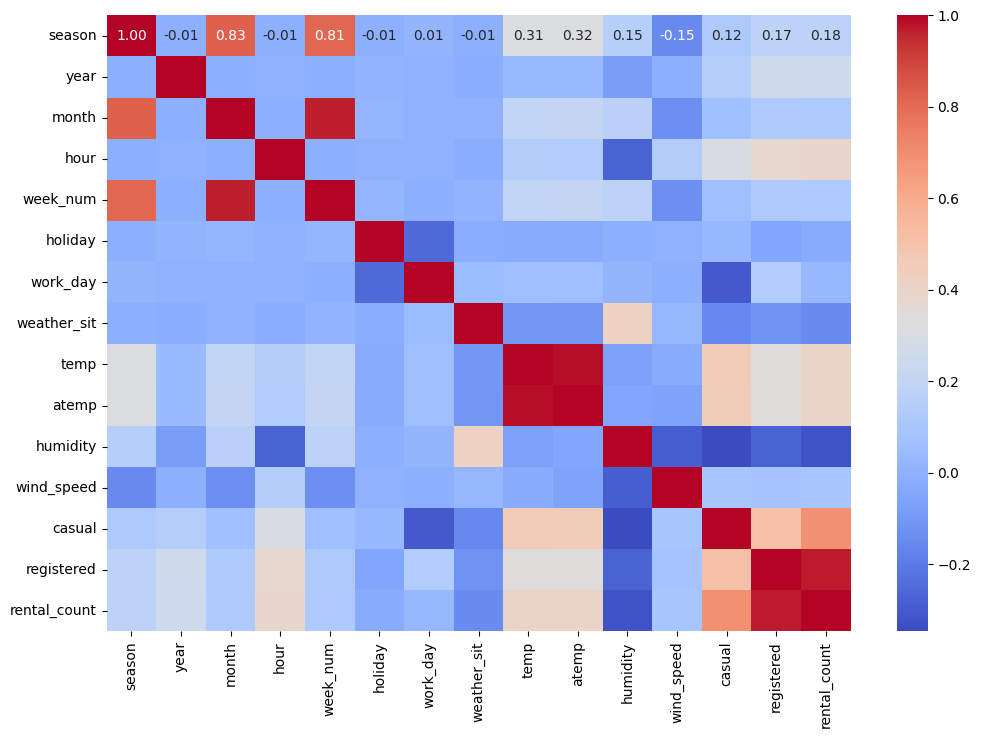

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi
df_2 = hour_df.drop(['weekday'], axis=1)
corr = df_2.corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Menampilkan heatmap
plt.show()

In [20]:
hour_df['s1_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 7 and x['hour'] < 19 and x['season'] == 1) else 0, axis=1)
hour_df['s2_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 6 and x['hour'] < 20 and x['season'] == 2) else 0, axis=1)
hour_df['s3_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 5 and x['hour'] < 21 and x['season'] == 3) else 0, axis=1)
hour_df['s4_daylight_hrs'] = hour_df.apply(lambda x: 1 if (x['hour'] > 7 and x['hour'] < 19 and x['season'] == 4) else 0, axis=1)

In [21]:
hour_df['midnight'] = np.where(hour_df['hour'].between(23, 2, inclusive='right'), 1, 0)
hour_df['early_morning'] = np.where(hour_df['hour'].between(2, 6, inclusive='right'), 1, 0)
hour_df['morning'] = np.where(hour_df['hour'].between(6, 9, inclusive='right'), 1, 0)
hour_df['late_morning'] = np.where(hour_df['hour'].between(9, 12, inclusive='right'), 1, 0)
hour_df['afternoon'] = np.where(hour_df['hour'].between(12, 16, inclusive='right'), 1, 0)
hour_df['late_afternoon'] = np.where(hour_df['hour'].between(16, 17, inclusive='right'), 1, 0)
hour_df['early_evening'] = np.where(hour_df['hour'].between(17, 19, inclusive='right'), 1, 0)
hour_df['evening'] = np.where(hour_df['hour'].between(19, 21, inclusive='right'), 1, 0)
hour_df['late_evening'] = np.where(hour_df['hour'].between(21, 23, inclusive='right'), 1, 0)

In [23]:
season_registered = hour_df.groupby(['season'])['registered'].sum()
season_casual = hour_df.groupby(['season'])['casual'].sum()
season_registered = season_registered / season_registered.sum()
season_casual = season_casual / season_casual.sum()

season_registered = season_registered.reset_index()
season_casual = season_casual.reset_index()

In [24]:
season_registered

,season,registered
0,1,0.153677
1,2,0.267549
2,3,0.312437
3,4,0.266338


In [25]:
season_casual

,season,casual
0,1,0.097775
1,2,0.328252
2,3,0.364653
3,4,0.209320


/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

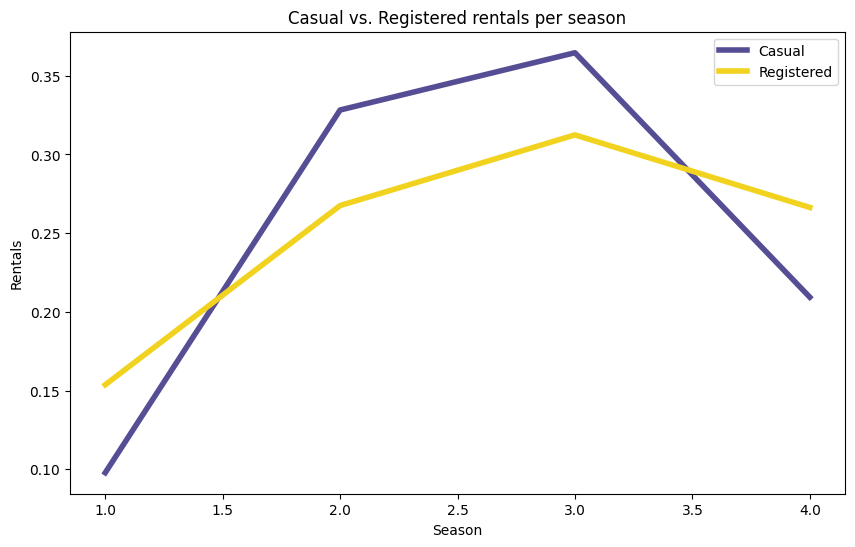

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
x = season_casual['season']
casual = season_casual['casual']
registered = season_registered['registered']

# Membuat plot dengan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=casual, label='Casual', color='#564E95', linewidth=4)
sns.lineplot(x=x, y=registered, label='Registered', color='#F1D31F', linewidth=4)

# Menambahkan judul dan label sumbu
plt.title('Casual vs. Registered rentals per season')
plt.xlabel('Season')
plt.ylabel('Rentals')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [31]:
df_casual_avg = hour_df.groupby(['season', 'year']).agg({'casual': 'mean'}).reset_index()
df_casual_avg.rename(columns={'casual': 'casual_avg'}, inplace=True)
df_casual_avg

,season,year,casual_avg
0,1,0,10.360251
1,1,1,18.029899
2,2,0,35.208352
3,2,1,57.097915
4,3,0,42.611607
5,3,1,57.908245
6,4,0,24.748360
7,4,1,36.686845


In [60]:
df_casual_avg = hour_df.groupby(['season', 'year']).agg({'casual': 'mean'}).reset_index()
df_casual_avg.rename(columns={'casual': 'casual_avg'}, inplace=True)
df_casual_avg

,season,year,casual_avg
0,1,0,10.360251
1,1,1,18.029899
2,2,0,35.208352
3,2,1,57.097915
4,3,0,42.611607
5,3,1,57.908245
6,4,0,24.748360
7,4,1,36.686845


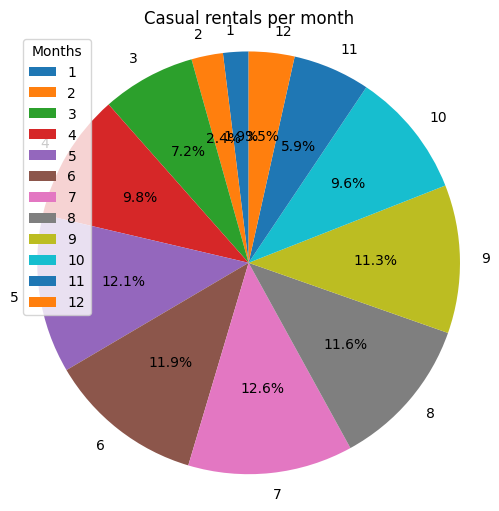

In [38]:
import matplotlib.pyplot as plt

df_casual_month = hour_df.groupby(['month']).agg({'casual': 'sum'}).reset_index()
df_casual_month.rename(columns={'casual': 'casual_sum'}, inplace=True)

# Data
months = df_casual_month['month']
casual_sum = df_casual_month['casual_sum']

# Warna untuk setiap bagian pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Explode (untuk memisahkan sebagian potongan)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(casual_sum, labels=months, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Casual rentals per month')

# Menambahkan legend
plt.legend(loc="best", labels=months, title="Months")

plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan pie chart
plt.show()


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of labels (288).

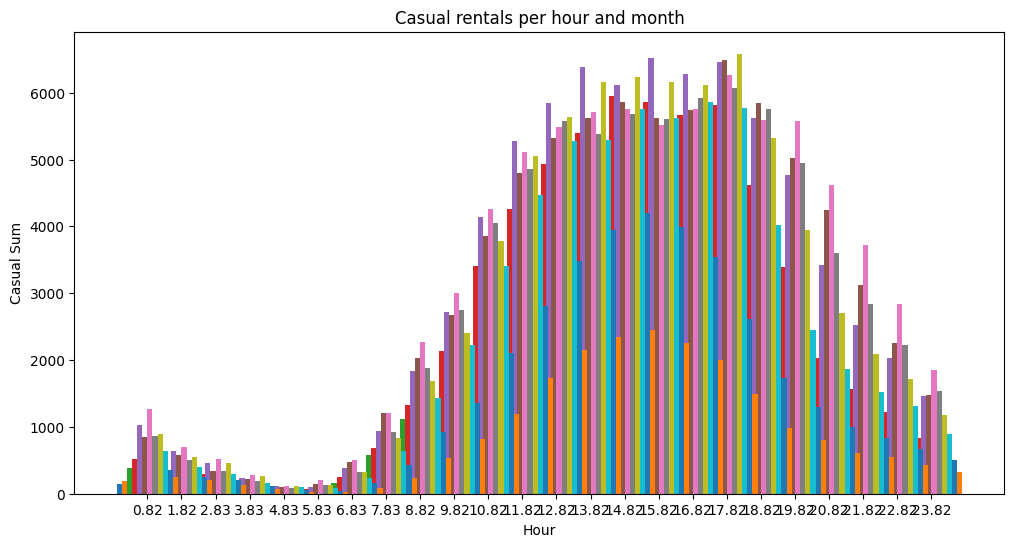

In [48]:
import matplotlib.pyplot as plt
df_casual_hour_month = hour_df.groupby(['hour', 'month']).agg({'casual': 'sum'}).reset_index()
df_casual_hour_month.rename(columns={'casual': 'casual_sum'}, inplace=True)

# Data
hour = df_casual_hour_month['hour']
casual_sum = df_casual_hour_month['casual_sum']
months = df_casual_hour_month['month']

# Membuat plot
fig, ax = plt.subplots(figsize=(12, 6))

# Mengelompokkan data berdasarkan bulan
unique_months = df_casual_hour_month['month'].unique()
num_months = len(unique_months)
bar_width = 0.15
bar_positions = [x for x in range(24)]

for i, month in enumerate(unique_months):
    month_data = casual_sum[df_casual_hour_month['month'] == month]
    ax.bar([x + i * bar_width for x in bar_positions], month_data, width=bar_width, label=f'Month {month}')

# Menambahkan judul dan label sumbu
ax.set_title('Casual rentals per hour and month')
ax.set_xlabel('Hour')
ax.set_ylabel('Casual Sum')

# Menambahkan label untuk sumbu x
ax.set_xticks([x + ((num_months - 1) * bar_width) / 2 for x in bar_positions])
ax.set_xticklabels(hour)

# Menambahkan legenda
ax.legend(title='Month')

# Menampilkan plot
plt.show()
